## PHASE-4 PROJECT SUBMSISSION 
### GROUP-$ Members
Name : Edgar Kiprono,Sarah Karanja,Denis Njogu,Alice Mumbi,Moschini Onyango,Brandon Muraya

Student pace: DS-full time-Online

Submission Date : 12/04/2024

### PROJECT-RECOMMENDATION SYSTEMs

## Introduction

In a world filled with an endless stream of entertainment options, users are often left stranded in a sea of choices, paralyzed by decision overload when it comes to selecting movies. The quest for the perfect film aligned with individual tastes can feel like an elusive endeavor, leaving viewers frustrated and dissatisfied. Recognizing this pressing challenge, there emerges an urgent call for a transformative solution – an intelligent recommendation system poised to navigate the labyrinth of available movies and deliver tailored suggestions that resonate with each user's unique preferences.

Imagine a scenario where users are greeted with a curated list of top-notch movie recommendations, meticulously tailored to their tastes and preferences. Picture the excitement of discovering hidden cinematic gems or exploring new genres that captivate and enthrall. This project embarks on a journey to revolutionize the movie-watching experience, providing users with a personalized roadmap to cinematic bliss. By harnessing the power of cutting-edge technology and sophisticated algorithms, we aim to unlock a world of endless possibilities, enhancing user satisfaction and engagement with streaming platforms. Welcome to the future of movie recommendations – where every click opens the door to a world of cinematic delight.

### Business Understanding
In an era where user engagement and satisfaction are paramount, personalized recommendation systems have become indispensable tools for businesses seeking to thrive in the competitive landscape. At Money-team$ Co., we recognize the transformative potential of these systems to not only meet but exceed user expectations. Imagine a world where every click on our streaming platform is met with a tailored recommendation, guiding users on a journey of cinematic exploration perfectly aligned with their tastes and preferences. With our cutting-edge technology and innovative algorithms, we are poised to redefine the movie-watching experience, making each interaction a seamless blend of excitement and anticipation.

For stakeholders invested in the success of Money-team$ Co., this project signifies more than just a technological endeavor – it represents a commitment to excellence and a dedication to providing unparalleled value to our users. By leveraging personalized movie recommendations, we aim to not only enhance user satisfaction but also drive increased viewer retention, platform usage, and revenue generation. Together, let's embark on this thrilling journey towards creating a recommendation system that sets new standards of excellence in the streaming industry, elevating the user experience to unprecedented heights.


### Problem Statement
To recommend top 5 movies based on customer ratings of other movies to money-team Co$ users 

## Data Understanding
### Data source
The project data was outsourced from grouplens(https://grouplens.org/datasets/movielens/latest/).
The MovieLens dataset serves as the backbone for numerous academic papers and machine learning proofs-of-concept, owing to its rich and diverse nature. However, our endeavor is not merely academic; it's about addressing a real-world business problem within the context of recommending movies. Hence, in addition to crafting an efficient recommendation model.

To accomplish this, we delve into the renowned MovieLens dataset, a cornerstone in the realm of recommendation systems. Developed by the GroupLens research lab at the University of Minnesota, the MovieLens dataset contains a wealth of information, encompassing user ratings for a vast array of movies. While the dataset offers various subsets, we recommend utilizing the "small" dataset, which It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. This subset provides a manageable yet comprehensive dataset to derive meaningful insights and build robust recommendation models.


### Data-sets understanding

In [235]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [237]:
#read link csv file
data1 = pd.read_csv('Data/links.csv')
#show df shape
print(data1.shape)
#print top5 rows
data1.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [239]:
#read movie csv file
data2 = pd.read_csv('Data/movies.csv')
#print column/rows shape
print(data2.shape)
data2.head(5)

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [240]:
#read ratings csv file
data3 = pd.read_csv('Data/ratings.csv')
#show ratings shape
print(data3.shape)
data3.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [241]:
#read tags csc file
data4 = pd.read_csv('Data/tags.csv')
print(data4.shape)
data4.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [244]:
def display_missing_values(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check for missing values
    missing_values = df.isna().sum()
    
    # Display missing values
    print("Missing values in", csv_file)
    print(missing_values)

# Example usage:
# Replace 'file_path.csv' with the path to your CSV file
print(display_missing_values('Data/links.csv'))
print(display_missing_values('Data/movies.csv'))
print(display_missing_values('Data/ratings.csv'))
print(display_missing_values('Data/tags.csv'))

Missing values in Data/links.csv
movieId    0
imdbId     0
tmdbId     8
dtype: int64
None
Missing values in Data/movies.csv
movieId    0
title      0
genres     0
dtype: int64
None
Missing values in Data/ratings.csv
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
None
Missing values in Data/tags.csv
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
None


#### Merge files

In [246]:
#merge dataframes using movie ID
#merge links csv and movies csv
result = pd.merge(data1, data2, on='movieId', how='inner')
#merge result with ratings csv
result = pd.merge(result, data3, on='movieId', how='inner')

In [247]:
result.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [249]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   imdbId     100836 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100836 non-null  object 
 4   genres     100836 non-null  object 
 5   userId     100836 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  100836 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


In [250]:
#checking for duplicated values
duplicates = result[result.duplicated()]
duplicates

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp


In [254]:
#checking for outliers
print("Maximum rating: ",result["rating"].max())
print("Minimum rating: ",result["rating"].min())

Maximum rating:  5.0
Minimum rating:  0.5


In [179]:
result["rating"].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [261]:
#top ten movie titles
title_count = result["title"].value_counts()
title_count.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [262]:
#top 10 movie genres
genre_counts = result["genres"].value_counts().head(10)
genre_counts

genres
Comedy                       7196
Drama                        6291
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: count, dtype: int64

In [263]:
#movie ratings grouped by genres
Movie_rating = result.groupby("genres")["rating"].value_counts()
Movie_rating

genres              rating
(no genres listed)  4.0        8
                    4.5        8
                    5.0        7
                    2.5        6
                    3.0        6
                              ..
Western             4.5       16
                    3.5       12
                    2.0       10
                    1.0        5
                    2.5        3
Name: count, Length: 5464, dtype: int64

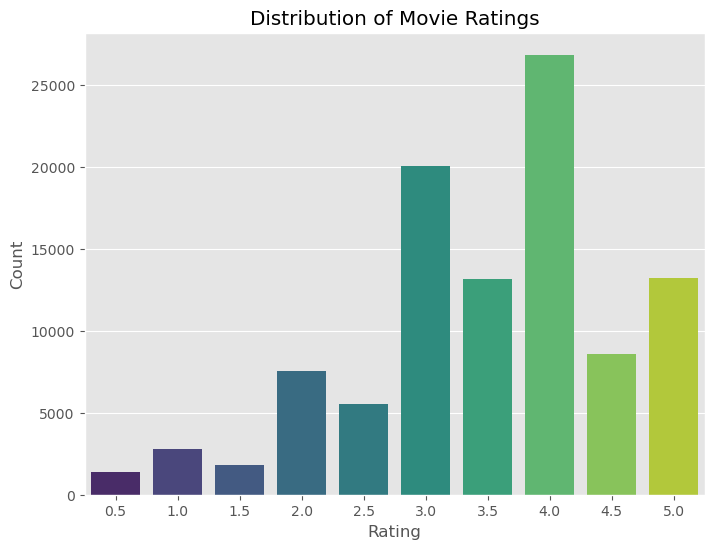

In [287]:
#movies counts using ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=result, palette='viridis')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

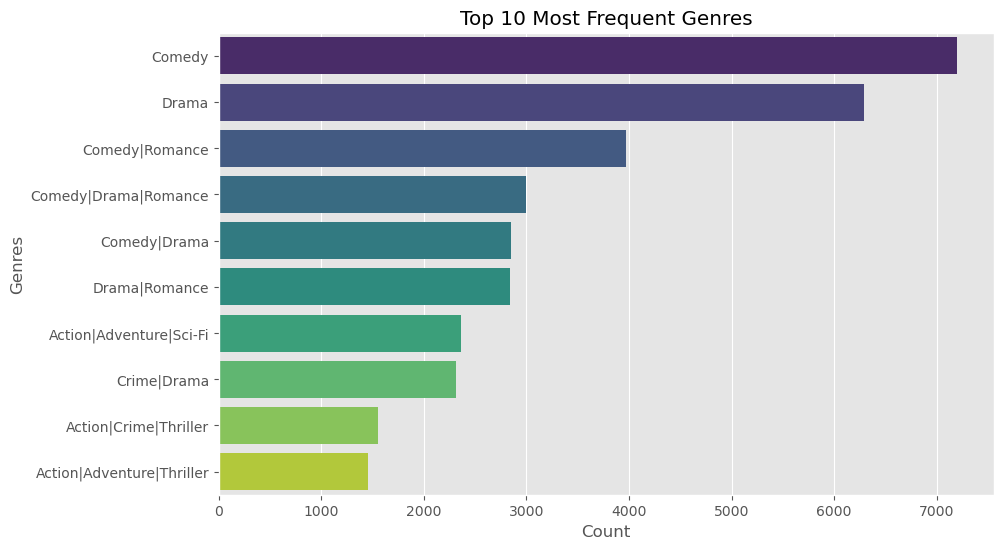

In [286]:
# top 10 most frequent genres
genre_counts = result["genres"].value_counts().head(10)

# Plot the count of top 10 genres with genres on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Most Frequent Genres")
plt.show()


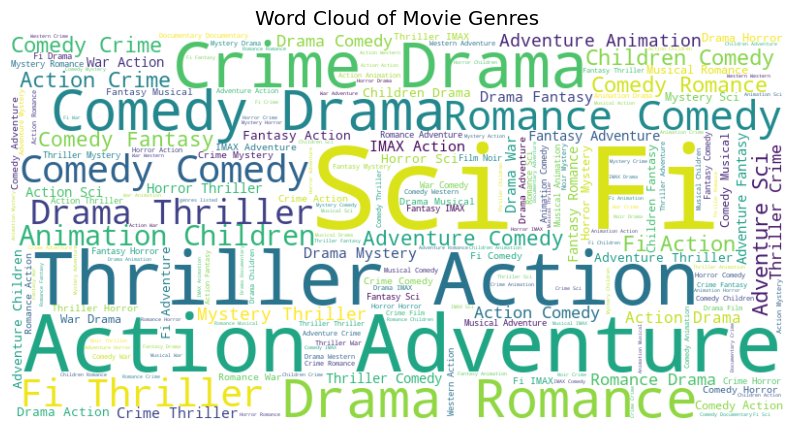

In [300]:
from wordcloud import WordCloud
# Combine all genres into a single string
genres_text = ' '.join(result['genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')  # Hide axis
plt.show()


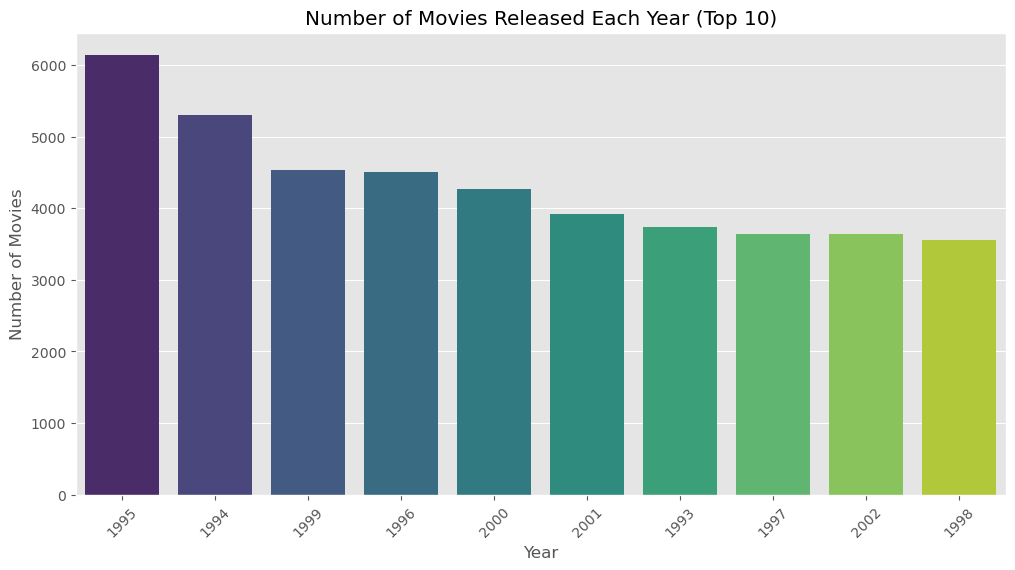

In [308]:
# Extract the year from the title using regular expressions
result['year'] = result['title'].str.extract(r'\((\d{4})\)')

# top 10 years with the highest counts of movies
top_10_years = result['year'].value_counts().head(10)

# Plot the number of movies released in each of the top 10 years
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year (Top 10)')
plt.xticks(rotation=45)
plt.show()
